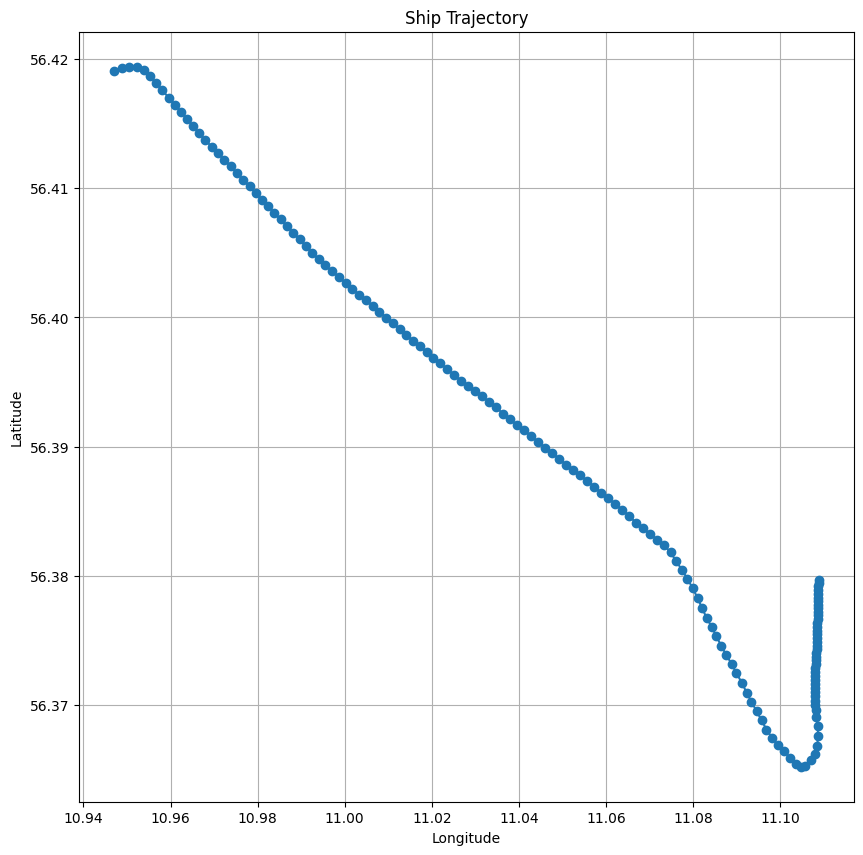

In [1]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from a file
with open('test/mmsi_219024784_trajectory.json') as f:
    json_data = json.load(f)

# Extract the latitude and longitude from each data point
latitudes = [datapoint['lat'] for datapoint in json_data['data']]
longitudes = [datapoint['lon'] for datapoint in json_data['data']]

# Plot the trajectory
plt.figure(figsize=(10, 10))
plt.plot(longitudes, latitudes, marker='o')
plt.title('Ship Trajectory')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

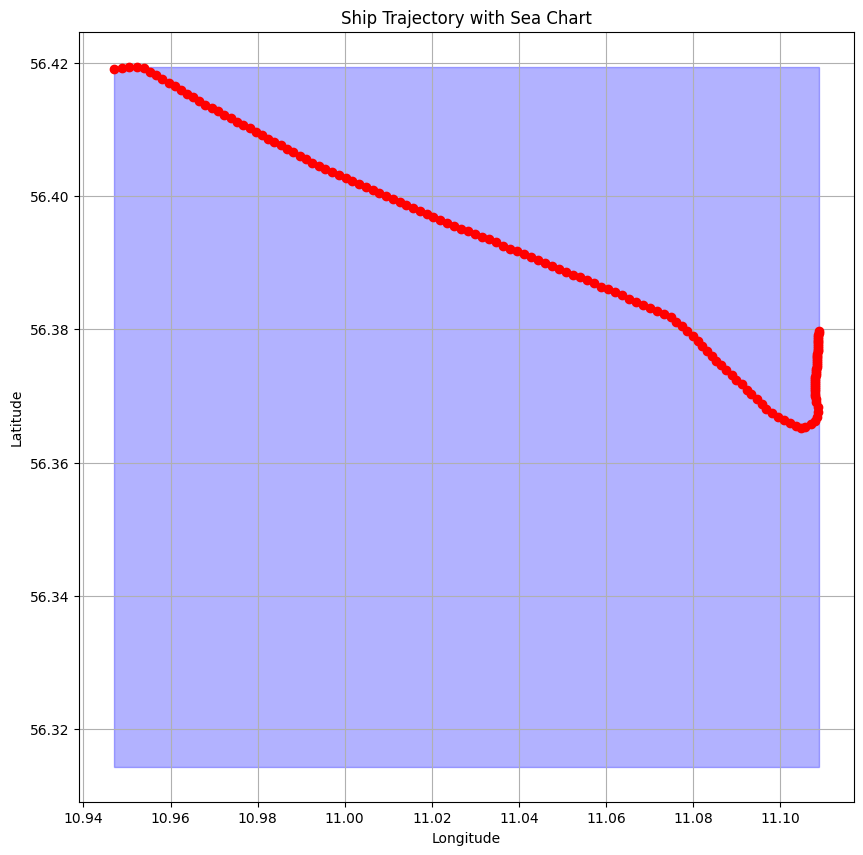

In [3]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the ship trajectory data
with open('test/mmsi_219024784_trajectory.json') as f:
    trajectory_data = json.load(f)

# Load the sea chart data
with open('test/seachart.json') as f:
    seachart_data = json.load(f)

# Extract the latitude and longitude from each data point
latitudes = [datapoint['lat'] for datapoint in trajectory_data['data']]
longitudes = [datapoint['lon'] for datapoint in trajectory_data['data']]

# Plot the sea chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.add_patch(patches.Polygon(seachart_data['bounds'], fill=True, color='blue', alpha=0.3))

# Plot the ship trajectory
ax.plot(longitudes, latitudes, marker='o', color='red')

# Set the title and labels
ax.set_title('Ship Trajectory with Sea Chart')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the grid
ax.grid(True)

# Show the plot
plt.show()

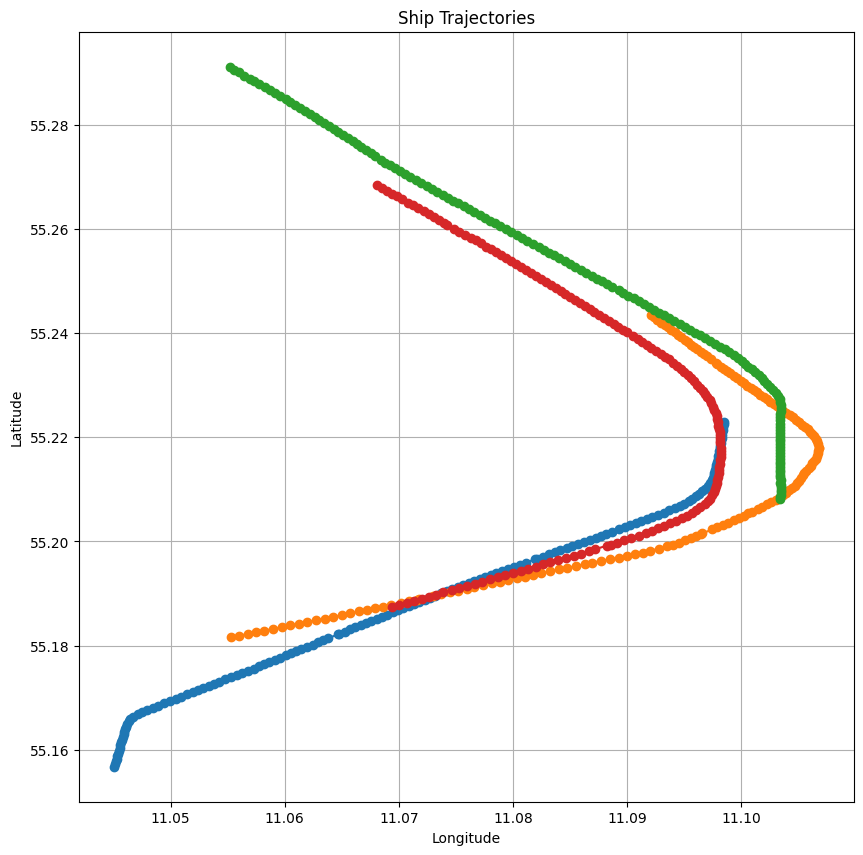

In [7]:
import os
import json
import matplotlib.pyplot as plt


folder = 'ais_data/scenario_0f8b152ed1'

# Get a list of all the JSON files in the directory
json_files = [f for f in os.listdir(folder) if f.endswith('trajectory.json')]

# Create a new plot
plt.figure(figsize=(10, 10))

# Load and plot each file
for json_file in json_files:
    json_file = os.path.join(folder, json_file)
    with open(json_file) as f:
        data = json.load(f)
    latitudes = [datapoint['lat'] for datapoint in data['data']]
    longitudes = [datapoint['lon'] for datapoint in data['data']]
    plt.plot(longitudes, latitudes, marker='o')

# Set the title and labels
plt.title('Ship Trajectories')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

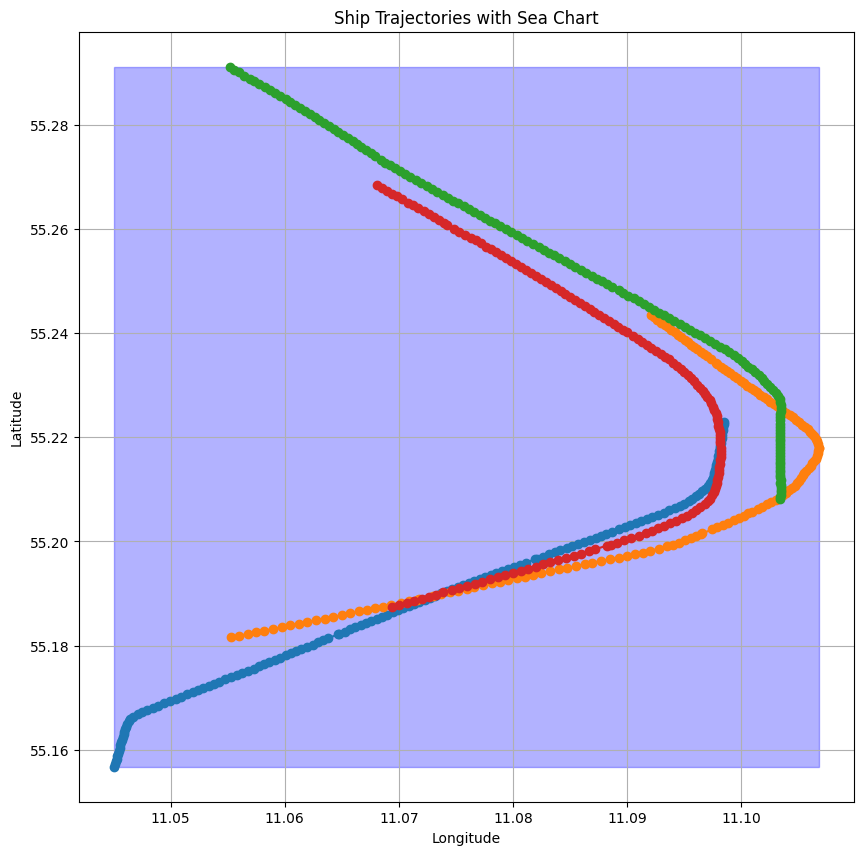

In [8]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches


folder = 'ais_data/scenario_0f8b152ed1'

# Load the sea chart data
with open(os.path.join(folder, 'seachart.json')) as f:
    seachart_data = json.load(f)

# Create a new plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the sea chart
ax.add_patch(patches.Polygon(seachart_data['bounds'], fill=True, color='blue', alpha=0.3))

# Get a list of all the JSON files in the directory
json_files = [f for f in os.listdir(folder) if f.endswith('trajectory.json')]

# Load and plot each file
for json_file in json_files:
    json_file = os.path.join(folder, json_file)
    with open(json_file) as f:
        data = json.load(f)
    latitudes = [datapoint['lat'] for datapoint in data['data']]
    longitudes = [datapoint['lon'] for datapoint in data['data']]
    ax.plot(longitudes, latitudes, marker='o')

# Set the title and labels
ax.set_title('Ship Trajectories with Sea Chart')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the grid
ax.grid(True)

# Show the plot
plt.show()

In [10]:
import pygame
import math

# Initialize Pygame
pygame.init()

# Set up some constants
WIDTH, HEIGHT = 800, 600
SHIP_SIZE = 50

# Create the screen
screen = pygame.display.set_mode((WIDTH, HEIGHT))

# Create a ship
ship = pygame.image.load('../ship.jpeg')  # Load a ship image
ship = pygame.transform.scale(ship, (SHIP_SIZE, SHIP_SIZE))  # Scale it to the right size

# Set the ship's initial position and direction
x, y = WIDTH // 2, HEIGHT // 2
angle = 0

# Main game loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Fill the screen with black
    screen.fill((0, 0, 0))

    # Rotate the ship
    rotated_ship = pygame.transform.rotate(ship, angle)
    rect = rotated_ship.get_rect(center = (x, y))

    # Draw the ship
    screen.blit(rotated_ship, rect.topleft)

    # Update the display
    pygame.display.flip()

    # Update the ship's direction
    angle += 1  # Change this to make the ship turn faster or slower

    # Update the ship's position
    x += math.cos(math.radians(angle))  # Change these to make the ship move in a different way
    y += math.sin(math.radians(angle))

# Quit Pygame
pygame.quit()

: 

In [9]:
import json
import pickle


import json

class Scenario:
    def __init__(self, scenario_data):
        self.scenario_id = scenario_data.get('scenario_id')
        self.start_time = scenario_data.get('start_time')
        self.end_time = scenario_data.get('end_time')
        self.start_epoch = scenario_data.get('start_epoch')
        self.end_epoch = scenario_data.get('end_epoch')
        self.sampling_time = scenario_data.get('sampling_time')
        self.lat_limits = scenario_data.get('lat_limits')
        self.lon_limits = scenario_data.get('lon_limits')
        self.n_vessels = scenario_data.get('n_vessels')
        self.collision_mmsis = scenario_data.get('collision_mmsis')

    def __str__(self):
        return f'Scenario {self.scenario_id} from {self.start_time} to {self.end_time} with {self.n_vessels} vessels'


with open('test/metadata.json') as f:
    scenario_data = json.load(f)

scenario = Scenario(scenario_data)
print(scenario)




Scenario 2efe764e53 from 2020-20-01 21:20:00 to 2020-45-01 21:45:00 with 2 vessels


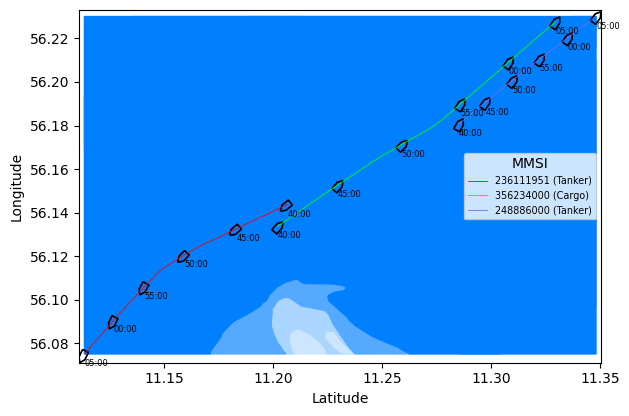

In [5]:
from sllib.visualisations import seamanship_score

import pandas as pd

# /home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_0a79611eb0

[df,dict_e] = seamanship_score.plot_scenario("/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_0a79611eb0", with_risk=False)
#[df,dict_e] = seamanship_score.plot_scenario("/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61", with_risk=False)





In [6]:
df.head()

,scenario,mmsi,ship_type,width,length,draught,nav_status,timestamp,lat,lon,...,risk_ground,risk_ground_action,f_min_arena,DDV_arena,TDV_arena,f_min_arena_ts,DDV_arena_ts,TDV_arena_ts,lat_ts,lon_ts
0,2a66ceaf61,219023834,Pilot,7.0,17.0,4.0,0,1.577906e+09,54.933790,10.833927,...,0.0,0.0,inf,0.0,NaN,inf,0.0,NaN,54.945173,10.903921
1,2a66ceaf61,219023834,Pilot,7.0,17.0,4.0,0,1.577906e+09,54.933790,10.833927,...,0.0,0.0,inf,NaN,-0.004684,NaN,NaN,-0.006203,54.934751,10.834758
2,2a66ceaf61,219023834,Pilot,7.0,17.0,4.0,0,1.577906e+09,54.933779,10.833829,...,0.0,0.0,inf,0.0,NaN,inf,0.0,NaN,54.945478,10.904592
3,2a66ceaf61,219023834,Pilot,7.0,17.0,4.0,0,1.577906e+09,54.933779,10.833829,...,0.0,0.0,inf,NaN,-0.010430,NaN,NaN,-0.009435,54.934751,10.834758
4,2a66ceaf61,219023834,Pilot,7.0,17.0,4.0,0,1.577906e+09,54.933743,10.833695,...,0.0,0.0,inf,0.0,NaN,inf,0.0,NaN,54.945742,10.905213


In [5]:
import sllib.parsers.ais_scenario as ais 

scenario_path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61"
#scenario_path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_0a79611eb0"

lat0, lon0 = ais.scenario_to_origin_coordinate(scenario_path)
timestamp0 = ais.scenario_to_origin_time(scenario_path)
states = ais.scenario_to_vessel_states(scenario_path)
lands = ais.scenario_to_lands(scenario_path)
#lands = ais.lands_to_north_east(lands, lat0, lon0)



ais.lat_lon_to_north_east(55.10154336363636, 11.044121727272728, 54.98554027272727, 10.973631818181818)

    # "lat_limits": [
    #     54.98554027272727,
    #     55.10154336363636
    # ],
    # "lon_limits": [
    #     10.973631818181818,
    #     11.044121727272728
    # ],
lands

[[(54.9352871, 10.8340317),
  (54.9352064, 10.8338796),
  (54.9351499, 10.8339471),
  (54.9350831, 10.8339112),
  (54.935097445255124, 10.83367575),
  (54.95792888888889, 10.83367575),
  (54.95792888888889, 10.85004446471951),
  (54.95576, 10.84812),
  (54.9517048, 10.844489),
  (54.9487342, 10.8424167),
  (54.9465211, 10.8407696),
  (54.9446393, 10.8388163),
  (54.9427601, 10.8380683),
  (54.9398165, 10.8359825),
  (54.9367288, 10.8343742),
  (54.9357672, 10.8341691),
  (54.9353414, 10.8343275),
  (54.9352871, 10.8340317)],
 [(54.9347338, 10.8341885),
  (54.9346989, 10.834242),
  (54.9346474, 10.8342102),
  (54.9346673, 10.8337322),
  (54.9344862, 10.8337197),
  (54.9344465, 10.8348019),
  (54.9344128, 10.834857),
  (54.9342805, 10.8349228),
  (54.9342011, 10.8348022),
  (54.9341908, 10.8347866),
  (54.9340342, 10.8346403),
  (54.934302420802254, 10.83367575),
  (54.93482693395213, 10.83367575),
  (54.9347338, 10.8341885)]]

In [7]:
import sllib.parsers.ais_scenario as ais

scenario_path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_0a79611eb0"

data = ais.scenario_to_vessel_states_and_lands_north_east(scenario_path)

data["vessels"][356234000].keys()
#dict_keys(['states', 'metadata', 'neighbor_states'])
print(data["vessels"][356234000]["states"][1577932800.0])
print(data["vessels"][356234000]["metadata"])
print(data["vessels"][356234000]["neighbor_states"][236111951][1577932800.0])

In [3]:
from scm_irl.utils.process_scenario import Scenario

scenario_path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_0a79611eb0"

scm = Scenario(scenario_path)


print(scm.get_vessel_state_time(356234000,1577932800.0))
print(scm.get_vessel_metadata(356234000))
print(scm.get_vessel_neighbor_state_time(356234000,236111951,1577932800.0))


VesselState(timestamp=0.0, lat=6533.495108101856, lon=5515.681150087054, sog=8.848367999999999, cog=0.7228156430759373)
VesselMetaData(mmsi=356234000, ship_type='Cargo', width=61.0, length=399.0, draught=12.1, nav_status=0)
VesselState(timestamp=0.0, lat=7643.9411825631105, lon=5792.727603233813, sog=6.4305, cog=4.014257279586958)


In [4]:
from scm_irl.utils.process_scenario import Scenario

scm = Scenario("/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_0a79611eb0")

dd = scm.get_vessel_relative_neighbor_states(356234000,236111951)

dd.keys()

# get the 1st key 
first_key = next(iter(dd))
first_key

# get the last key
last_key = next(reversed(dd))
last_key

1577934300.0

In [5]:
next(iter(scm.vessels[236111951]['states']))

1577932800.0

In [2]:
from scm_irl.utils.process_scenario import Scenario

scm = Scenario("/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_0a79611eb0")
#356234000
#scm.vessels[356234000]['relative_neighbor_states'][236111951]
scm.vessels[236111951]['relative_neighbor_states'][356234000]

{1577932800.0: VesselState(timestamp=0.0, lat=-694.9650878412649, lon=-847.7201572498307, sog=15.20680546582365, cog=-3.2914416365110206),
 1577932810.0: VesselState(timestamp=10.0, lat=-639.4773494079709, lon=-711.5359804090112, sog=15.196028082856252, cog=-3.302279300056738),
 1577932820.0: VesselState(timestamp=20.0, lat=-578.6500588450581, lon=-566.1471637040377, sog=15.186988179053508, cog=-3.310839724483187),
 1577932830.0: VesselState(timestamp=30.0, lat=-522.005922595039, lon=-430.8461379916407, sog=15.176021127375119, cog=-3.320681568135341),
 1577932840.0: VesselState(timestamp=40.0, lat=-460.3960616802797, lon=-284.59029252873734, sog=15.206934340174874, cog=-3.3278774624193215),
 1577932850.0: VesselState(timestamp=50.0, lat=-404.6701664039865, lon=-150.71163746574894, sog=15.270132606548131, cog=-3.3274437745445833),
 1577932860.0: VesselState(timestamp=60.0, lat=-345.36387671064585, lon=-10.129266014322639, sog=15.270680950739557, cog=-3.32698540524608),
 1577932870.0: Ve

In [3]:
from scm_irl.env.scm_irl_env import ScmIrlEnv
from sllib.conversions.geo_conversions import north_east_to_lat_lon, mps2knots, lat_lon_to_north_east
import numpy as np

env = ScmIrlEnv("/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_0a79611eb0", mmsi=356234000)

#env.step([2,1])
env.mmsi

print(env.get_vessel_metadata())



print(env.agent_state)

timestep = env.timestep

data = []

def vessel_state_to_dict(vessel_state, timestep):
    lat, lon = north_east_to_lat_lon(vessel_state.lat, vessel_state.lon, env.scenario.lat0, env.scenario.lon0)
    cog = np.rad2deg(vessel_state.cog)
    sog = mps2knots(vessel_state.sog)

    return {
        "timestamp": timestep,
        "lat": lat,
        "lon": lon,
        "cog": cog,
        "sog": sog
    }

data.append(vessel_state_to_dict(env.agent_state,timestep))


print(data)


while not env.done:
    timestep = env.timestep
    action = env.get_action_from_vessel(timestep)
    agent_state, reward, terminate, done, info = env.step(action)

    data.append(vessel_state_to_dict(agent_state,timestep))

    #print(action)
    #print(ret)


#     # create random action
#     # action = env.action_space.sample()
#     # # take action
#     # env.step(action)
#     env.step([2.0055,i])

env.close()

mmsi: 356234000, start_time: 1577932800.0, end_time: 1577934300.0
VesselMetaData(mmsi=356234000, ship_type='Cargo', width=61.0, length=399.0, draught=12.1, nav_status=0)
VesselState(timestamp=0.0, lat=6533.495108101856, lon=5515.681150087054, sog=8.848367999999999, cog=0.7228156430759373)
[{'timestamp': 1577932800.0, 'lat': 56.133794947399004, 'lon': 11.201989634723244, 'cog': 41.41428571428571, 'sog': 17.19985140388769}]


failed to open /dev/dri/card0: Permission denied
failed to open /dev/dri/card0: Permission denied
failed to load driver: iris


In [13]:
print(lat_lon_to_north_east(56.133795, 11.201989714285714, env.scenario.lat0, env.scenario.lon0))

(6533.495108101856, 5515.681150087054)


In [4]:

        # {
        #     "timestamp": 1577932800.0,
        #     "lat": 56.133795,
        #     "lon": 11.201989714285714,
        #     "sog": 17.2,
        #     "cog": 41.41428571428571
        # },


data

[{'timestamp': 1577932800.0,
  'lat': 56.133794947399004,
  'lon': 11.201989634723244,
  'cog': 41.41428571428571,
  'sog': 17.19985140388769},
 {'timestamp': 1577932800.0,
  'lat': 56.13439023803391,
  'lon': 11.202932392349519,
  'cog': 41.41428571428571,
  'sog': 17.19985140388769},
 {'timestamp': 1577932810.0,
  'lat': 56.13499264169253,
  'lon': 11.203860561638937,
  'cog': 40.633333333333326,
  'sog': 17.19985140388769},
 {'timestamp': 1577932820.0,
  'lat': 56.13560124060343,
  'lon': 11.204775692191744,
  'cog': 39.94285714285712,
  'sog': 17.19985140388769},
 {'timestamp': 1577932830.0,
  'lat': 56.136213259023314,
  'lon': 11.205683493701516,
  'cog': 39.557142857142885,
  'sog': 17.19985140388769},
 {'timestamp': 1577932840.0,
  'lat': 56.13682612927411,
  'lon': 11.206589464403091,
  'cog': 39.45999999999998,
  'sog': 17.19985140388769},
 {'timestamp': 1577932850.0,
  'lat': 56.137443679329834,
  'lon': 11.20749828858113,
  'cog': 39.333333333333314,
  'sog': 17.29985053995

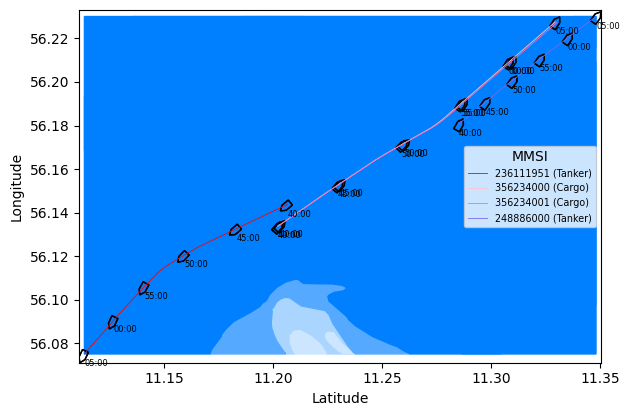

In [1]:
from sllib.visualisations import seamanship_score

import pandas as pd

# /home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_0a79611eb0

[df,dict_e] = seamanship_score.plot_scenario("/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_0a79611eb0", with_risk=False)

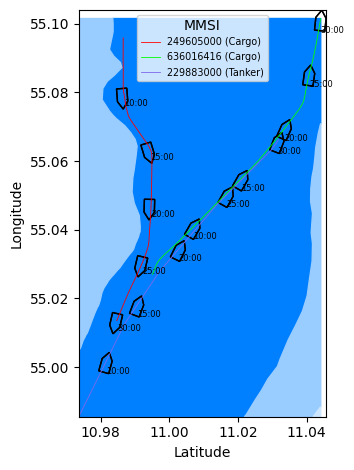

In [1]:
from sllib.visualisations import seamanship_score

import pandas as pd

# /home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_0a79611eb0

scenario_path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61"
scenario_path = "/home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_01e88fc6af"


[df,dict_e] = seamanship_score.plot_scenario(scenario_path, with_risk=False)

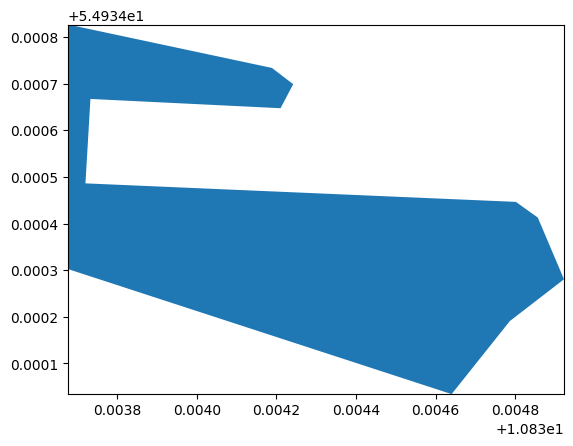

In [28]:
import sllib.parsers.ais_scenario as ais_scenario
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


scenario_path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61"

lands = ais_scenario.scenario_to_lands(scenario_path)

lands

land  = lands[1]

# plot this 

# Create a polygon and add it to the plot
polygon = Polygon([(x[1], x[0]) for x in land], fill=True)
plt.gca().add_patch(polygon)

# Set the axes limits to fit the plot
plt.xlim(min(x[1] for x in land), max(x[1] for x in land))
plt.ylim(min(x[0] for x in land), max(x[0] for x in land))

plt.show()


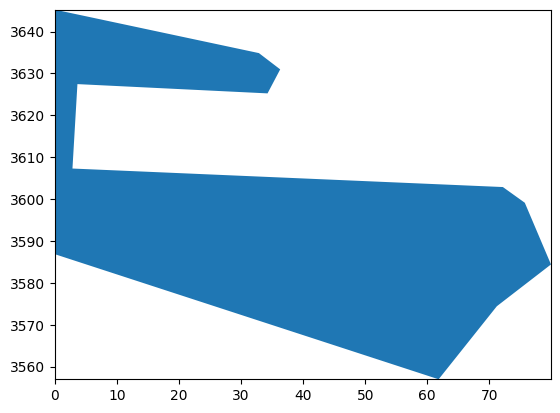

In [2]:
from sllib.conversions.geo_conversions import lat_lon_to_north_east
import sllib.parsers.ais_scenario as ais_scenario
import os
import pickle


def scenario_to_lands_north_east(scenario_path):
    lon0, lat0 = ais_scenario.scenario_to_origin_coordinate(scenario_path)
    with open(os.path.join(scenario_path,"land.pickle"), 'rb') as file:
        lands = pickle.load(file)
    land_idx = 0
    land_polygons = []
    for polygon in lands:
        if polygon.geom_type == 'Polygon':
            x, y = polygon.exterior.xy
            polygon_list = []
            for i in range(len(x)):
                north, east = lat_lon_to_north_east(y[i], x[i], lat0, lon0)
                polygon_list.append((north, east))
            #ax.annotate(str(land_idx), xy=(np.mean(x),np.mean(y)))
            land_idx += 1
            land_polygons.append(polygon_list)
        elif polygon.geom_type == 'MultiPolygon':
            for poly in polygon.geoms:
                x, y = poly.exterior.xy
                #ax.annotate(str(land_idx), xy=(np.mean(x),np.mean(y)))
                land_idx += 1
                polygon_list = []
                for i in range(len(x)):
                    north, east = lat_lon_to_north_east(y[i], x[i], lat0, lon0)
                    polygon_list.append((north, east))
                land_polygons.append(polygon_list)
    return land_polygons



import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


scenario_path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61"


lands = scenario_to_lands_north_east(scenario_path)

lands

land  = lands[1]

# plot this 

# Create a polygon and add it to the plot
polygon = Polygon([(x[1], x[0]) for x in land], fill=True)
plt.gca().add_patch(polygon)

# Set the axes limits to fit the plot
plt.xlim(min(x[1] for x in land), max(x[1] for x in land))
plt.ylim(min(x[0] for x in land), max(x[0] for x in land))

plt.show()

mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0


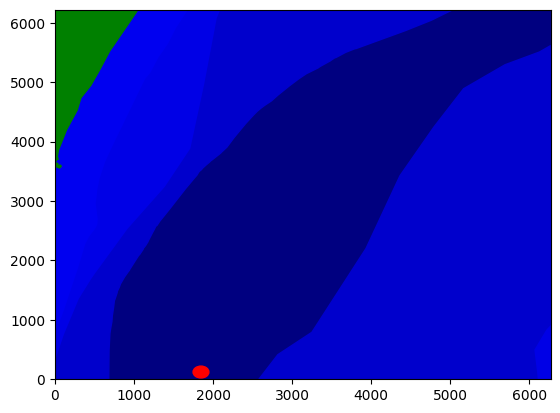

In [80]:
from scm_irl.env.scm_irl_env import ScmIrlEnv
from sllib.conversions.geo_conversions import north_east_to_lat_lon, mps2knots, lat_lon_to_north_east
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.patches import Circle


env = ScmIrlEnv("/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61", mmsi=215811000)


# 219023834
#mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0
#mmsi: 219023834, start_time: 1577904600.0, end_time: 1577906100.0

lands = env.scenario.scenario_to_lands()

depths = env.scenario.scenario_to_depths()


land  = lands[0]

# plot this 

# Create a polygon and add it to the plot



def darken_blue_color(factor):
    r = 1-factor
    g = (1-factor)/2 + 0.5
    b = 1.0
    return (r,g,b)


import matplotlib.colors as mcolors

def modulate_color(color, factor):
    # Convert the color to RGB
    rgb = mcolors.to_rgb(color)

    # Modulate each of the RGB values
    modulated_rgb = [x * factor for x in rgb]

    # Make sure each value is within the valid range [0, 1]
    modulated_rgb = [min(max(x, 0), 1) for x in modulated_rgb]

    return modulated_rgb

color = 'blue'

for depth in depths:
    polygon = Polygon([(x[1], x[0]) for x in depth[0]], fill=True, color=modulate_color(color, 1- depth[1]/100))
    plt.gca().add_patch(polygon)

for land in lands:
    polygon = Polygon([(x[1], x[0]) for x in land], fill=True, color='green')
    plt.gca().add_patch(polygon)

circle = Circle((env.agent_state.lon, env.agent_state.lat), 100, fill=True, color='red')

plt.gca().add_patch(circle)

# Set the axes limits to fit the plot
plt.xlim(env.scenario.east_min, env.scenario.east_max)
plt.ylim(env.scenario.north_min, env.scenario.north_max)

plt.show()

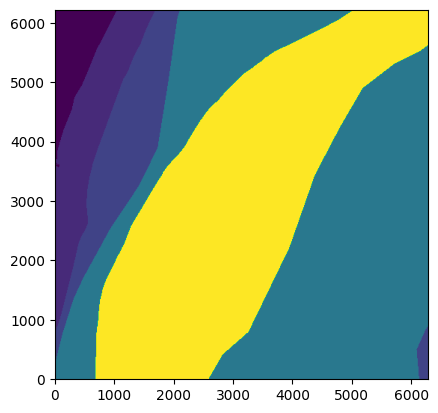

In [81]:
import numpy as np
import rasterio
from rasterio.features import rasterize
from shapely.geometry import Polygon

# Define the size of the matrix
matrix_size = (500, 500)

# Create an empty matrix
matrix = np.zeros(matrix_size)

depths_pos = [x[0] for x in depths]

# Calculate the bounds of the polygons
min_x = min(min(x[1] for x in polygon) for polygon in lands + depths_pos)
max_x = max(max(x[1] for x in polygon) for polygon in lands + depths_pos)
min_y = min(min(x[0] for x in polygon) for polygon in lands + depths_pos)
max_y = max(max(x[0] for x in polygon) for polygon in lands + depths_pos)

# Define the transformation from matrix coordinates to real world coordinates
transform = rasterio.transform.from_bounds(min_x, min_y, max_x, max_y, *matrix_size)


# For each depth polygon, rasterize the polygon onto the matrix
for depth in depths:
    polygon = Polygon([(x[1], x[0]) for x in depth[0]])
    matrix += rasterize([(polygon, depth[1])], out_shape=matrix_size, transform=transform)


# For each land polygon, rasterize the polygon onto the matrix
matrix_land = np.zeros(matrix_size)
for land in lands:
    polygon = Polygon([(x[1], x[0]) for x in land])
    matrix_land += rasterize([(polygon, 1)], out_shape=matrix_size, transform=transform)

matrix = np.where(matrix_land == 1, 0, matrix)

# Plot the matrix
plt.imshow(matrix, cmap='viridis', extent=(min_x, max_x, min_y, max_y))

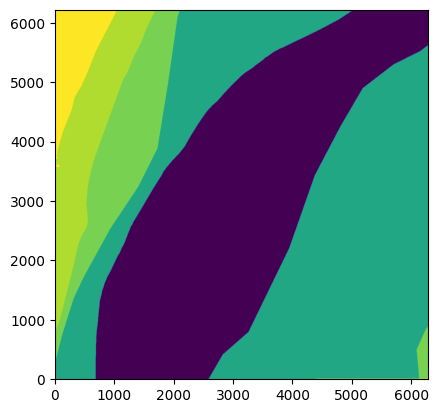

In [82]:
import numpy as np
import rasterio
from rasterio.features import rasterize
from shapely.geometry import Polygon

# Define the size of the matrix
pixels_meter = 5


# Calculate the bounds of the polygons in meters
min_x = min(min(x[1] for x in polygon) for polygon in lands + depths_pos)
max_x = max(max(x[1] for x in polygon) for polygon in lands + depths_pos)
min_y = min(min(x[0] for x in polygon) for polygon in lands + depths_pos)
max_y = max(max(x[0] for x in polygon) for polygon in lands + depths_pos)


matrix_size = (int((max_x-min_x)/pixels_meter)-1, int((max_y-min_y)/pixels_meter)-1)

# Create an empty matrix
matrix = np.zeros(matrix_size)

# Define the transformation from matrix coordinates to meters
transform = rasterio.transform.from_origin(min_x, max_y, (max_x - min_x) / matrix_size[1], (max_y - min_y) / matrix_size[0])

# For each depth polygon, rasterize the polygon onto the matrix
for depth in depths:
    polygon = Polygon([(x[1], x[0]) for x in depth[0]])
    matrix += rasterize([(polygon, depth[1])], out_shape=matrix_size, transform=transform)

# For each land polygon, rasterize the polygon onto the matrix
matrix_land = np.zeros(matrix_size)
for land in lands:
    polygon = Polygon([(x[1], x[0]) for x in land])
    matrix_land += rasterize([(polygon, 1)], out_shape=matrix_size, transform=transform)

matrix = np.where(matrix_land == 1, 0, matrix)


# Plot the matrix
plt.imshow(matrix, cmap='viridis_r', extent=(min_x, max_x, min_y, max_y))

In [38]:
matrix_size

(1255, 1243)

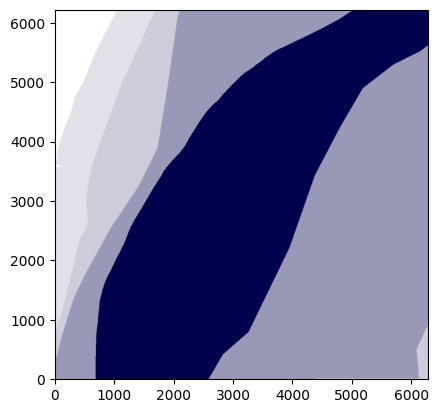

In [83]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

def modulate_color(color, factor):
    # Convert the color to RGB
    rgb = mcolors.to_rgb(color)

    # Modulate each of the RGB values
    modulated_rgb = [x * factor for x in rgb]

    # Make sure each value is within the valid range [0, 1]
    modulated_rgb = [min(max(x, 0), 1) for x in modulated_rgb]

    return modulated_rgb

color = 'blue'
modulated_color = modulate_color(color, 0.3)

# Create a colormap that goes from white to the modulated color
cmap = LinearSegmentedColormap.from_list('custom', ['white', modulated_color])

# Plot the matrix using the custom colormap
plt.imshow(matrix, cmap=cmap, extent=(min_x, max_x, min_y, max_y))

In [84]:
matrix[-1,:] = (matrix[-2,:] + matrix[-3,:])/2
matrix[:,-1] = (matrix[:,-2] + matrix[:,-3])/2
matrix[0,:] = (matrix[1,:] + matrix[2,:])/2
matrix[:,0] = (matrix[:,1] + matrix[:,2])/2

In [41]:
matrix_size

(1255, 1243)

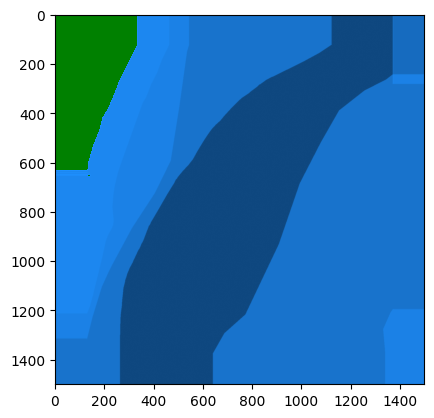

In [88]:
import numpy as np
from scipy.ndimage import map_coordinates

# Define the center, size, and rotation angle of the sub-matrix
center = (matrix_size[0]/2, matrix_size[1]/2)
# center = (100, 100)
size = (1500, 1500)
#size = matrix_size
angle = np.radians(0)

# Create a rotation matrix
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])

# Create a grid of coordinates for the sub-matrix
y, x = np.mgrid[0:size[0], 0:size[1]]
coords = np.array([y - size[0] / 2, x - size[1] / 2])

# Rotate the grid of coordinates
rotated_coords = np.tensordot(rotation_matrix, coords, axes=1)

# Translate the rotated grid of coordinates
translated_coords = rotated_coords + np.array(center).reshape(2, 1, 1)


matrix[:][0]

# Interpolate the values of the main matrix at the coordinates of the translated grid
sub_matrix = map_coordinates(matrix, translated_coords, order=1, mode='nearest')


def modulate_color(color, factor):
    # Convert the color to RGB
    rgb = mcolors.to_rgb(color)

    # Modulate each of the RGB values
    modulated_rgb = [x * factor for x in rgb]

    # Make sure each value is within the valid range [0, 1]
    modulated_rgb = [min(max(x, 0), 1) for x in modulated_rgb]

    return modulated_rgb

color = 'dodgerblue'
#color = 'royalblue'
modulated_color = modulate_color(color, 1)

colors = [(0, "green")]
for i in range(1, 256):
    colors.append((i/255, modulate_color(color, 1-i/255)))

cmap = LinearSegmentedColormap.from_list('custom', colors)


# Plot the normalized matrix
plt.imshow(sub_matrix/100, cmap=cmap, vmin=0, vmax=1)

In [349]:
colors

[(0, 'green'),
 (0.010101010101010102, [0.0, 0.0, 1.0]),
 (0.020202020202020204, [0.0, 0.0, 1]),
 (0.030303030303030304, [0.0, 0.0, 1]),
 (0.04040404040404041, [0.0, 0.0, 1]),
 (0.050505050505050504, [0.0, 0.0, 1]),
 (0.06060606060606061, [0.0, 0.0, 1]),
 (0.0707070707070707, [0.0, 0.0, 1]),
 (0.08080808080808081, [0.0, 0.0, 1]),
 (0.09090909090909091, [0.0, 0.0, 1]),
 (0.10101010101010101, [0.0, 0.0, 1]),
 (0.1111111111111111, [0.0, 0.0, 1]),
 (0.12121212121212122, [0.0, 0.0, 1]),
 (0.13131313131313133, [0.0, 0.0, 1]),
 (0.1414141414141414, [0.0, 0.0, 1]),
 (0.15151515151515152, [0.0, 0.0, 1]),
 (0.16161616161616163, [0.0, 0.0, 1]),
 (0.1717171717171717, [0.0, 0.0, 1]),
 (0.18181818181818182, [0.0, 0.0, 1]),
 (0.1919191919191919, [0.0, 0.0, 1]),
 (0.20202020202020202, [0.0, 0.0, 1]),
 (0.21212121212121213, [0.0, 0.0, 1]),
 (0.2222222222222222, [0.0, 0.0, 1]),
 (0.23232323232323232, [0.0, 0.0, 1]),
 (0.24242424242424243, [0.0, 0.0, 1]),
 (0.25252525252525254, [0.0, 0.0, 1]),
 (0.262626

In [122]:
print(sub_matrix.min(), sub_matrix.max())

49.99999999999999 50.00000000000001


In [ ]:
min_x = min(min(x[1] for x in polygon) for polygon in lands + depths)

mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0


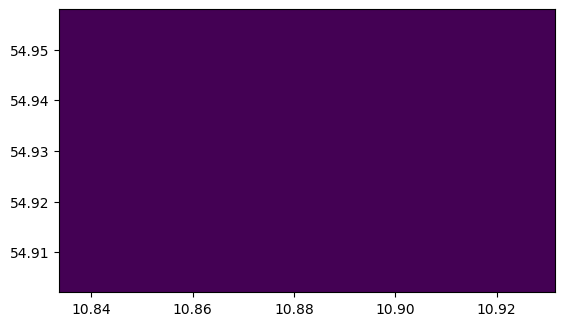

In [46]:
import numpy as np
import rasterio
from rasterio.features import rasterize
from shapely.geometry import Polygon
import sllib.parsers.ais_scenario as ais_scenario

scenario_path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61"

env = ScmIrlEnv(scenario_path, mmsi=215811000)

lands = ais_scenario.scenario_to_lands(scenario_path)

# Define the size of the matrix
matrix_size = (100, 100)

# Create an empty matrix
matrix = np.zeros(matrix_size)

# Define the transformation from matrix coordinates to real world coordinates
# This will depend on the actual range of your data
transform = rasterio.transform.from_origin(env.scenario.lon0, env.scenario.lat0, 0.01, 0.01)

# # For each depth polygon, rasterize the polygon onto the matrix
# for depth in depths:
#     polygon = Polygon([(x[1], x[0]) for x in depth[0]])
#     matrix += rasterize([(polygon, depth[1])], out_shape=matrix_size, transform=transform)

# For each land polygon, rasterize the polygon onto the matrix
for land in lands:
    polygon = Polygon([(x[1], x[0]) for x in land])
    matrix += rasterize([(polygon, 0)], out_shape=matrix_size, transform=transform)

# Plot the matrix
plt.imshow(matrix, extent=(env.scenario.lon_limits[0], env.scenario.lon_limits[1], env.scenario.lat_limits[0], env.scenario.lat_limits[1]))
plt.show()

In [47]:
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# OPERATION WITH POLYGONS


mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0


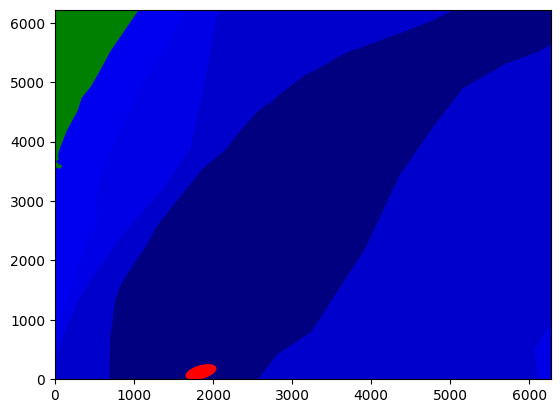

In [43]:
from scm_irl.env.scm_irl_env import ScmIrlEnv
from sllib.conversions.geo_conversions import north_east_to_lat_lon, mps2knots, lat_lon_to_north_east
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse



env = ScmIrlEnv("/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61", mmsi=215811000)


# 219023834
#mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0
#mmsi: 219023834, start_time: 1577904600.0, end_time: 1577906100.0

lands = env.scenario.scenario_to_lands()

depths = env.scenario.scenario_to_depths()


land  = lands[0]

# plot this 

# Create a polygon and add it to the plot



def darken_blue_color(factor):
    r = 1-factor
    g = (1-factor)/2 + 0.5
    b = 1.0
    return (r,g,b)


import matplotlib.colors as mcolors

def modulate_color(color, factor):
    # Convert the color to RGB
    rgb = mcolors.to_rgb(color)

    # Modulate each of the RGB values
    modulated_rgb = [x * factor for x in rgb]

    # Make sure each value is within the valid range [0, 1]
    modulated_rgb = [min(max(x, 0), 1) for x in modulated_rgb]

    return modulated_rgb

color = 'blue'






for depth in depths:
    polygon = Polygon([(x[1], x[0]) for x in depth[0]], fill=True, color=modulate_color(color, 1- depth[1]/100))
    plt.gca().add_patch(polygon)

for land in lands:
    polygon = Polygon([(x[1], x[0]) for x in land], fill=True, color='green')
    plt.gca().add_patch(polygon)

# circle = Circle((env.agent_state.lon, env.agent_state.lat), 100, fill=True, color='red')

# plt.gca().add_patch(circle)

ellipse = Ellipse((env.agent_state.lon, env.agent_state.lat), 400, 200, fill=True, color='red', angle=env.agent_state.cog*180/np.pi)

plt.gca().add_patch(ellipse)

# Set the axes limits to fit the plot
plt.xlim(env.scenario.east_min, env.scenario.east_max)
plt.ylim(env.scenario.north_min, env.scenario.north_max)

plt.show()

In [45]:
env.agent_state.cog*180/np.pi
env.agent_state.lat

121.62966767843639

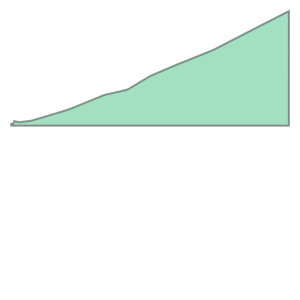

mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0


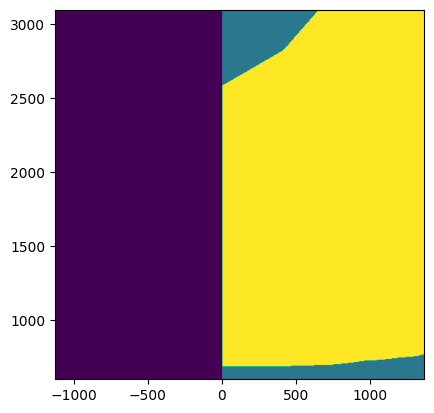

In [105]:
from scm_irl.env.scm_irl_env import ScmIrlEnv
from sllib.conversions.geo_conversions import north_east_to_lat_lon, mps2knots, lat_lon_to_north_east
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.patches import Circle


env = ScmIrlEnv("/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61", mmsi=215811000)


# 219023834
#mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0
#mmsi: 219023834, start_time: 1577904600.0, end_time: 1577906100.0

lands = env.scenario.scenario_to_lands()

depths = env.scenario.scenario_to_depths()


from shapely.affinity import translate, rotate
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
from shapely.geometry import Point

rot_angle = -env.agent_state.cog*180/np.pi
rot_angle = 0
# Calculate the common centroid
all_polygons = MultiPolygon([Polygon([(x[1], x[0]) for x in depth[0]]) for depth in depths] + [Polygon([(x[1], x[0]) for x in land]) for land in lands])
common_centroid = all_polygons.centroid
#common_centroid = Point(env.agent_state.lon, env.agent_state.lat)

# Rotate the polygons
for i, depth in enumerate(depths):
    depths[i] = (rotate(Polygon([(x[1], x[0]) for x in depth[0]]), rot_angle, origin=common_centroid), depth[1])

for i, land in enumerate(lands):
    lands[i] = rotate(Polygon([(x[1], x[0]) for x in land]), rot_angle, origin=common_centroid)




# conver this to a matrix
import numpy as np
import rasterio
from rasterio.features import rasterize
from shapely.geometry import Polygon

# Define the size of the matrix
matrix_size = (500, 500)

# Create an empty matrix
matrix = np.zeros(matrix_size)

depths_pos = [x[0] for x in depths]

# Calculate the bounds of the polygons
# min_x = min(min(x[1] for x in polygon.exterior.coords) for polygon in lands + depths_pos)
# max_x = max(max(x[1] for x in polygon.exterior.coords) for polygon in lands + depths_pos)
# min_y = min(min(x[0] for x in polygon.exterior.coords) for polygon in lands + depths_pos)
# max_y = max(max(x[0] for x in polygon.exterior.coords) for polygon in lands + depths_pos)

vessel_range_x = 2500
vessel_range_y = 2500

min_x = env.agent_state.lon - vessel_range_x/2
max_x = env.agent_state.lon + vessel_range_x/2
min_y = env.agent_state.lat - vessel_range_y/2
max_y = env.agent_state.lat + vessel_range_y/2



# Define the transformation from matrix coordinates to real world coordinates
transform = rasterio.transform.from_origin(min_x, max_y, (max_x - min_x) / matrix_size[1], (max_y - min_y) / matrix_size[0])

# For each depth polygon, rasterize the polygon onto the matrix
for depth in depths:
    matrix += rasterize([(depth[0], depth[1])], out_shape=matrix_size, transform=transform)

# For each land polygon, rasterize the polygon onto the matrix
matrix_land = np.zeros(matrix_size)
for land in lands:
    matrix_land += rasterize([(land, 1)], out_shape=matrix_size, transform=transform)

matrix = np.where(matrix_land == 1, 0, matrix)

rotated_matrix = np.rot90(matrix, 3)
# Plot the matrix
plt.imshow(rotated_matrix, cmap='viridis', extent=(min_y, max_y, min_x, max_x), origin='lower')




mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0


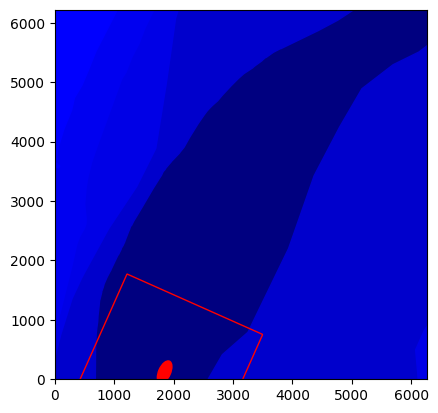

In [1]:
from scm_irl.env.scm_irl_env import ScmIrlEnv
from sllib.conversions.geo_conversions import north_east_to_lat_lon, mps2knots, lat_lon_to_north_east
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from shapely.geometry import box
from shapely.ops import unary_union
from rasterio import features
from shapely.affinity import rotate
from shapely.geometry import Polygon
import matplotlib.patches as patches
import matplotlib.colors as mcolors

from matplotlib.patches import Circle
from matplotlib.patches import Ellipse


env = ScmIrlEnv("/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61", mmsi=215811000)


# 219023834
#mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0
#mmsi: 219023834, start_time: 1577904600.0, end_time: 1577906100.0

lands = env.scenario.scenario_to_lands()

depths = env.scenario.scenario_to_depths()

depths_lands = [(Polygon(depth[0]), depth[1]) for depth in depths] + [(Polygon(land), 0) for land in lands]

# create the croping box
vessel_range_x = 2500
vessel_range_y = 2500

min_e = env.agent_state.lon - vessel_range_x/2
max_e = env.agent_state.lon + vessel_range_x/2
min_n = env.agent_state.lat - vessel_range_y/2
max_n = env.agent_state.lat + vessel_range_y/2

crop_box = box(min_e, min_n, max_e, max_n)
# Calculate the center of the box
center_e = (min_e + max_e) / 2
center_n = (min_n + max_n) / 2

rotated_crop_box = rotate(crop_box, 90- env.agent_state.cog*180/np.pi, origin=(center_e, center_n))


def modulate_color(color, factor):
    # Convert the color to RGB
    rgb = mcolors.to_rgb(color)

    # Modulate each of the RGB values
    modulated_rgb = [x * factor for x in rgb]

    # Make sure each value is within the valid range [0, 1]
    modulated_rgb = [min(max(x, 0), 1) for x in modulated_rgb]

    return modulated_rgb

color = 'blue'


for depth in depths_lands:
    polygon = patches.Polygon([(x[1], x[0]) for x in depth[0].exterior.coords], fill=True, color=modulate_color(color, 1- depth[1]/100))
    plt.gca().add_patch(polygon)

# add crop box
polygon = patches.Polygon([(x[0], x[1]) for x in rotated_crop_box.exterior.coords], fill=False, color='red')
plt.gca().add_patch(polygon)

ellipse = Ellipse((env.agent_state.lon, env.agent_state.lat), 400, 200, fill=True, color='red', angle=90-(env.agent_state.cog)*180/np.pi)

plt.gca().add_patch(ellipse)

# for land in lands:
#     polygon = patches.Polygon([(x[1], x[0]) for x in land], fill=True, color='green')
#     plt.gca().add_patch(polygon)

# circle = Circle((env.agent_state.lon, env.agent_state.lat), 100, fill=True, color='red')

# plt.gca().add_patch(circle)


# Set the axes limits to fit the plot
plt.xlim(env.scenario.east_min, env.scenario.east_max)
plt.ylim(env.scenario.north_min, env.scenario.north_max)

plt.gca().set_aspect('equal', adjustable='box')

plt.show()



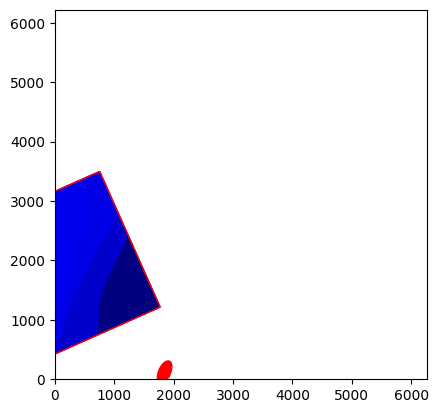

In [2]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
# depths_lands_inside = [(polygon, depth) for polygon, depth in depths_lands if rotated_crop_box.intersects(polygon)]
depths_lands_inside = [(polygon.intersection(rotated_crop_box), depth) for polygon, depth in depths_lands if rotated_crop_box.intersects(polygon)]
# matrix = rasterize(depths_lands_inside, out_shape=(100, 100), transform=transform)

# matrix

# colors = [(0, "green")]
# for i in range(1, 256):
#     colors.append((i/255, modulate_color(color, 1-i/255)))

# cmap = LinearSegmentedColormap.from_list('custom', colors)


# # Plot the normalized matrix
# plt.imshow(matrix/100, cmap=cmap, vmin=0, vmax=1)


for depth in depths_lands_inside:
    polygon = patches.Polygon([(x[1], x[0]) for x in depth[0].exterior.coords], fill=True, color=modulate_color(color, 1- depth[1]/100))
    plt.gca().add_patch(polygon)

# add crop box
polygon = patches.Polygon([(x[1], x[0]) for x in rotated_crop_box.exterior.coords], fill=False, color='red')
plt.gca().add_patch(polygon)

ellipse = Ellipse((env.agent_state.lon, env.agent_state.lat), 400, 200, fill=True, color='red', angle=90-(env.agent_state.cog)*180/np.pi)

plt.gca().add_patch(ellipse)

# Set the axes limits to fit the plot
plt.xlim(env.scenario.east_min, env.scenario.east_max)
plt.ylim(env.scenario.north_min, env.scenario.north_max)

plt.gca().set_aspect('equal', adjustable='box')

plt.show()

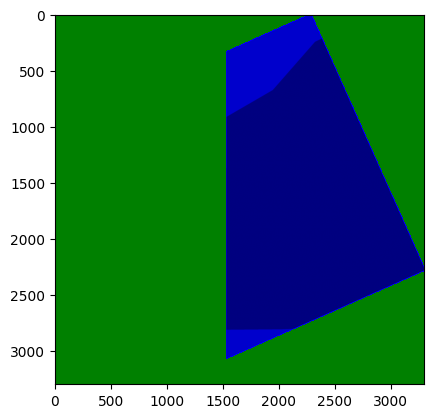

In [101]:
# Determine the spatial extent of the polygons
min_x, min_y, max_x, max_y = rotated_crop_box.bounds

# Determine the resolution of the raster
resolution = 1

# Determine the number of rows and columns of the raster
num_rows = int((max_y - min_y) / resolution)
num_cols = int((max_x - min_x) / resolution)

# Create a transformation matrix
transform = from_origin(min_x, max_y, resolution, resolution)
# Create the matrix
matrix = rasterize(depths_lands_inside, out_shape=(num_rows, num_cols), transform=transform)
matrix

colors = [(0, "green")]
for i in range(1, 256):
    colors.append((i/255, modulate_color(color, 1-i/255)))

cmap = LinearSegmentedColormap.from_list('custom', colors)


# Plot the normalized matrix
plt.imshow(matrix/100, cmap=cmap, vmin=0, vmax=1)

In [81]:
# cropped_polygons = [polygon.intersection(rotated_crop_box) for polygon in polygons]

# # Define the transformation from matrix coordinates to real world coordinates
# transform = rasterio.transform.from_origin(min_x, max_y, (max_x - min_x) / matrix_size[1], (max_y - min_y) / matrix_size[0])

# # For each depth polygon, rasterize the polygon onto the matrix
# for depth in depths:
#     matrix += rasterize([(depth[0], depth[1])], out_shape=matrix_size, transform=transform)

# # For each land polygon, rasterize the polygon onto the matrix
# matrix_land = np.zeros(matrix_size)
# for land in lands:
#     matrix_land += rasterize([(land, 1)], out_shape=matrix_size, transform=transform)


array([[ 0,  0,  0, ..., 20, 20, 20],
       [ 0,  0,  0, ..., 20, 20, 20],
       [ 0,  0,  0, ..., 20, 20, 20],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [27]:

def modulate_color(color, factor):
    # Convert the color to RGB
    rgb = mcolors.to_rgb(color)

    # Modulate each of the RGB values
    modulated_rgb = [x * factor for x in rgb]

    # Make sure each value is within the valid range [0, 1]
    modulated_rgb = [min(max(x, 0), 1) for x in modulated_rgb]

    return modulated_rgb

def plot_cropbox_area(depths_lands_inside, crop_box, env, color='blue'):
    
    for depth in depths_lands_inside:
        polygon = patches.Polygon([(x[0], x[1]) for x in depth[0].exterior.coords], fill=True, color=modulate_color(color, 1- depth[1]/100))
        plt.gca().add_patch(polygon)

    # add crop box
    polygon = patches.Polygon([(x[0], x[1]) for x in crop_box.exterior.coords], fill=False, color='red')
    plt.gca().add_patch(polygon)

    ellipse = Ellipse((env.agent_state.lon, env.agent_state.lat), 400, 200, fill=True, color='red', angle=90-(env.agent_state.cog)*180/np.pi)

    plt.gca().add_patch(ellipse)

    # Set the axes limits to fit the plot
    plt.xlim(env.scenario.east_min, env.scenario.east_max)
    plt.ylim(env.scenario.north_min, env.scenario.north_max)

    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()

mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0


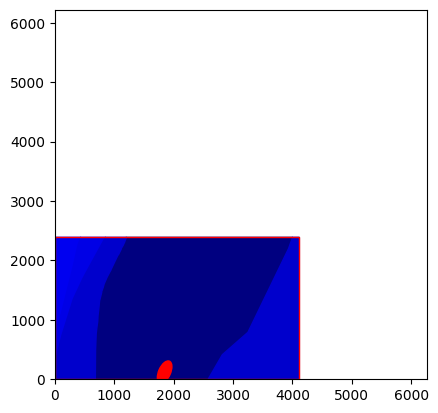

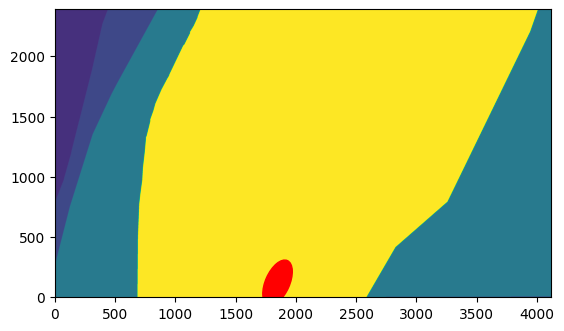

In [91]:
from scm_irl.env.scm_irl_env import ScmIrlEnv
from sllib.conversions.geo_conversions import north_east_to_lat_lon, mps2knots, lat_lon_to_north_east
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from shapely.geometry import box
from shapely.ops import unary_union
from rasterio import features
from shapely.affinity import rotate
from shapely.geometry import Polygon
import matplotlib.patches as patches
import matplotlib.colors as mcolors

from matplotlib.patches import Circle
from matplotlib.patches import Ellipse


env = ScmIrlEnv("/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61", mmsi=215811000)


d_l_poly = env.scenario.scenario_depth_lands_polygons()

angle = env.agent_state.cog
angle_deg = angle*180/np.pi


# create the croping box
vessel_range_x = 2500
vessel_range_y = 2500

# calculating the value by getting the hipotenuse of the vessel range
crop_box_range_north = np.sqrt(vessel_range_x**2 + vessel_range_y**2)+1000
crop_box_range_east = crop_box_range_north


crop_box_range_east

# min_e = env.agent_state.lon - vessel_range_x/2
# max_e = env.agent_state.lon + vessel_range_x/2
# min_n = env.agent_state.lat - vessel_range_y/2
# max_n = env.agent_state.lat + vessel_range_y/2

min_e = max([env.agent_state.lon - crop_box_range_north/2, env.scenario.east_min])
max_e = min([env.agent_state.lon + crop_box_range_north/2, env.scenario.east_max])
min_n = max([env.agent_state.lat - crop_box_range_east/2, env.scenario.north_min])
max_n = min([env.agent_state.lat + crop_box_range_east/2, env.scenario.north_max])

crop_box = box(min_e, min_n, max_e, max_n)

center_e = (min_e + max_e) / 2
center_n = (min_n + max_n) / 2

#crop_box = rotate(crop_box, angle_deg, origin=(center_e, center_n))

depths_lands_inside = [(polygon.intersection(crop_box), depth) for polygon, depth in d_l_poly if crop_box.intersects(polygon)]

plot_cropbox_area(depths_lands_inside, crop_box, env, color='blue')


# Convert to matrix
import numpy as np
import rasterio
from rasterio.features import rasterize
from shapely.geometry import Polygon
from rasterio.transform import from_origin

# Determine the spatial extent of the polygons
min_x, min_y, max_x, max_y = crop_box.bounds

# Determine the resolution of the raster
resolution = 1

# Determine the number of rows and columns of the raster
num_rows = int((max_y - min_y) / resolution)
num_cols = int((max_x - min_x) / resolution)
matrix_size = (num_rows, num_cols)

# Create a transformation matrix
transform = from_origin(min_x, max_y, resolution, resolution)
# Create the matrix
matrix = rasterize(depths_lands_inside, out_shape=(num_rows, num_cols), transform=transform, fill=-1)

#matrix_p = np.array(matrix)

# Plot the matrix
plt.imshow(matrix, cmap='viridis', extent=(min_x, max_x, min_y, max_y))
# Get the coordinates of the crop box
x, y = crop_box.exterior.coords.xy

# Plot the crop box
#plt.plot(x, y, color='red')

# draw the ellipse
ellipse = Ellipse((env.agent_state.lon, env.agent_state.lat), 400, 200, fill=True, color='red', angle=90-(env.agent_state.cog)*180/np.pi)

plt.gca().add_patch(ellipse)

# Show the plot
plt.show()


In [92]:
matrix[-1,:] = (matrix[-2,:] + matrix[-3,:])/2
matrix[:,-1] = (matrix[:,-2] + matrix[:,-3])/2
matrix[0,:] = (matrix[1,:] + matrix[2,:])/2
matrix[:,0] = (matrix[:,1] + matrix[:,2])/2

In [93]:
from scipy.ndimage import map_coordinates
import numpy as np

def extract_rotated_submatrix(matrix, center, size, angle):
    # Create a grid of coordinates for the submatrix
    x, y = np.meshgrid(np.arange(center[0] - size // 2, center[0] + size // 2),
                       np.arange(center[1] - size // 2, center[1] + size // 2))
    coords = np.vstack([x.ravel(), y.ravel()])

    # Rotate the grid of coordinates around the center
    theta = np.radians(angle)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])
    rotated_coords = np.dot(rotation_matrix, coords - np.array([[center[0]], [center[1]]])) + np.array([[center[0]], [center[1]]])

    # Use map_coordinates to extract the values at the rotated coordinates from the original matrix
    rotated_submatrix = map_coordinates(matrix, rotated_coords, order=1).reshape(size, size)

    return rotated_submatrix

# Set parameters: center, size, and angle of the submatrix
center = (matrix.shape[0] // 2, matrix.shape[1] // 2)  # Assuming the center is the center of the image
size = vessel_range_x +2000 # Adjust as needed
#angle = angle_deg  # Rotation angle in degrees

center = (env.agent_state.lon, env.agent_state.lat) 

# Extract the rotated submatrix
rotated_submatrix = extract_rotated_submatrix(matrix, center, size, 0)

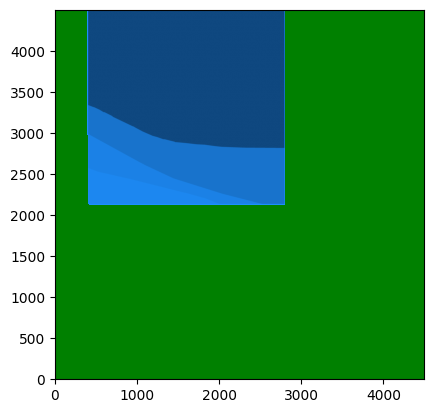

In [94]:
colors = [(0, "green")]
for i in range(1, 256):
    colors.append((i/255, modulate_color(color, 1-i/255)))

cmap = LinearSegmentedColormap.from_list('custom', colors)


# Plot the normalized matrix
plt.imshow(rotated_submatrix/100, cmap=cmap, vmin=0, vmax=1, origin='lower')

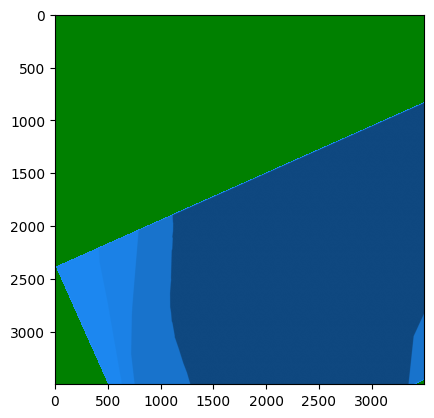

In [108]:
import numpy as np
from scipy.ndimage import map_coordinates

# Define the center, size, and rotation angle of the sub-matrix
#center = (matrix_size[0]/2, matrix_size[1]/2)
center = (env.agent_state.lat, env.agent_state.lon)
# center = (100, 100)
size = (vessel_range_x+1000, vessel_range_y+1000)
#size = matrix_size
angle = np.radians(-angle_deg)

# Create a rotation matrix
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])

# Create a grid of coordinates for the sub-matrix
y, x = np.mgrid[0:size[0], 0:size[1]]
coords = np.array([y - size[0] / 2, x - size[1] / 2])

# Rotate the grid of coordinates
rotated_coords = np.tensordot(rotation_matrix, coords, axes=1)

# Translate the rotated grid of coordinates
translated_coords = rotated_coords + np.array(center).reshape(2, 1, 1)


matrix[:][0]

# Interpolate the values of the main matrix at the coordinates of the translated grid
sub_matrix = map_coordinates(matrix, translated_coords, order=1)


def modulate_color(color, factor):
    # Convert the color to RGB
    rgb = mcolors.to_rgb(color)

    # Modulate each of the RGB values
    modulated_rgb = [x * factor for x in rgb]

    # Make sure each value is within the valid range [0, 1]
    modulated_rgb = [min(max(x, 0), 1) for x in modulated_rgb]

    return modulated_rgb

color = 'dodgerblue'
#color = 'royalblue'
modulated_color = modulate_color(color, 1)

colors = [(0, "green")]
for i in range(1, 256):
    colors.append((i/255, modulate_color(color, 1-i/255)))

cmap = LinearSegmentedColormap.from_list('custom', colors)


# Plot the normalized matrix
plt.imshow(sub_matrix/100, cmap=cmap, vmin=0, vmax=1)

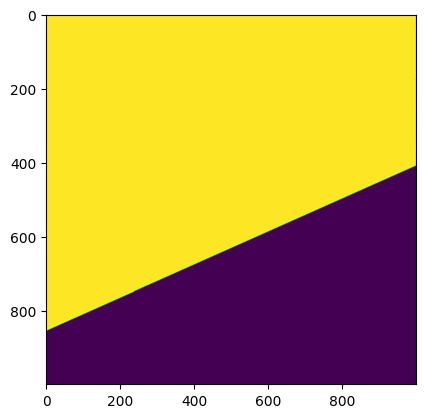

In [11]:
from skimage.transform import rotate
from skimage.util import crop




# center of matrix_p
center = np.array(matrix_p.shape)/2

rotated_image = rotate(matrix_p, 90-angle_deg, center=center)

# crop the image
# create a bounding box
c_min_x = int(center[1] - 1000/2)
c_max_x = int(center[1] + 1000/2)
c_min_y = int(center[0] - 1000/2)
c_max_y = int(center[0] + 1000/2)


# Calculate the amount to crop from each edge of the array
crop_y_min = c_min_y
crop_y_max = rotated_image.shape[0] - c_max_y
crop_x_min = c_min_x
crop_x_max = rotated_image.shape[1] - c_max_x

# Crop the image
cropped_image = crop(rotated_image, ((crop_y_min, crop_y_max), (crop_x_min, crop_x_max)))

plt.imshow(cropped_image, cmap='viridis')

In [12]:
from scipy.ndimage import distance_transform_edt, maximum_filter

# Create a mask of the area outside the polygons
mask = cropped_image < 0

from scipy.interpolate import griddata

# Get the coordinates of the non-zero pixels
coords = np.array(np.nonzero(~mask)).T

# Get the values of the non-zero pixels
values = cropped_image[~mask]

# Create a grid of coordinates for the interpolation
grid = np.indices(cropped_image.shape).reshape(2, -1).T

# Perform the interpolation
cropped_image = griddata(coords, values, grid, method='nearest').reshape(cropped_image.shape)

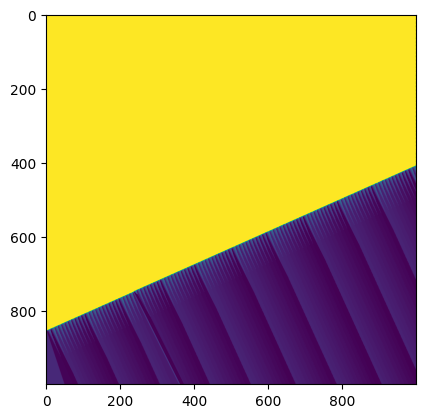

In [13]:
# Plot the matrix
plt.imshow(cropped_image, cmap='viridis')


## ALL TOGETHER


In [24]:
from scm_irl.env.scm_irl_env import ScmIrlEnv
from sllib.conversions.geo_conversions import north_east_to_lat_lon, mps2knots, lat_lon_to_north_east
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from shapely.geometry import box
from shapely.ops import unary_union
from rasterio import features
from shapely.affinity import rotate
from shapely.geometry import Polygon
import matplotlib.patches as patches
import matplotlib.colors as mcolors

from matplotlib.patches import Circle
from matplotlib.patches import Ellipse


env = ScmIrlEnv("/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61", mmsi=215811000)


d_l_poly = env.scenario.scenario_depth_lands_polygons()

angle = np.pi/2 - env.agent_state.cog
angle_deg = angle*180/np.pi


# create the croping box
vessel_range_x = 6000
vessel_range_y = 6000

# calculating the value by getting the hipotenuse of the vessel range
crop_box_range_north = np.sqrt(vessel_range_x**2 + vessel_range_y**2)
crop_box_range_east = crop_box_range_north


crop_box_range_east



min_e = max([env.agent_state.lon - vessel_range_x/2, env.scenario.east_min])
max_e = min([env.agent_state.lon + vessel_range_x/2, env.scenario.east_max])
min_n = max([env.agent_state.lat - vessel_range_y/2, env.scenario.north_min])
max_n = min([env.agent_state.lat + vessel_range_y/2, env.scenario.north_max])

crop_box = box(min_e, min_n, max_e, max_n)

center_e = (min_e + max_e) / 2
center_n = (min_n + max_n) / 2

#crop_box = rotate(crop_box, angle_deg, origin=(center_e, center_n))

depths_lands_inside = [(polygon.intersection(crop_box), depth) for polygon, depth in d_l_poly if crop_box.intersects(polygon)]

mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0


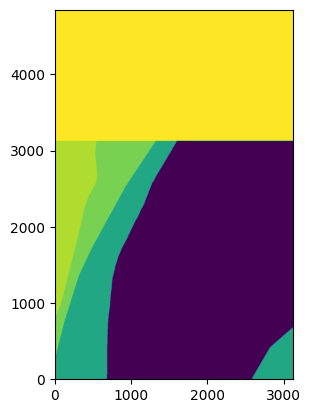

In [25]:
import numpy as np
import rasterio
from rasterio.features import rasterize
from shapely.geometry import Polygon

# Define the size of the matrix
pixels_meter = 5

depths_pos = [x[0] for x in depths_lands_inside]

# Calculate the bounds of the polygons in meters
min_x = min(min(x[1] for x in polygon.exterior.coords) for polygon in depths_pos)
max_x = max(max(x[1] for x in polygon.exterior.coords) for polygon in depths_pos)
min_y = min(min(x[0] for x in polygon.exterior.coords) for polygon in depths_pos)
max_y = max(max(x[0] for x in polygon.exterior.coords) for polygon in depths_pos)

matrix_size = (int((max_x-min_x)/pixels_meter)-1, int((max_y-min_y)/pixels_meter)-1)

matrix = np.zeros(matrix_size)

transform = rasterio.transform.from_origin(min_x, max_y, (max_x - min_x) / matrix_size[1], (max_y - min_y) / matrix_size[0])

# For each depth polygon, rasterize the polygon onto the matrix
for depth in depths_lands_inside:
    polygon = depth[0]
    matrix += rasterize([(polygon, depth[1])], out_shape=matrix_size, transform=transform)

plt.imshow(matrix, cmap='viridis_r', extent=(min_x, max_x, min_y, max_y))